In [6]:
import pandas as pd
import seaborn as sn

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/



def scale_matrix(A):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(A)
    A=scaler.transform(A)
    return A



link="https://leicester.figshare.com/articles/Myocardial_infarction_complications_Database/12045261?file=23581310"


d0 = pd.read_csv('myocardy_complications.csv')
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imp.fit(d0)
d0_imputed=imp.transform(d0)
y=d0_imputed[:,123]
d0_imputed =np.delete(d0_imputed,-1,axis=1)
print(d0_imputed.shape)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks
(1700, 123)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


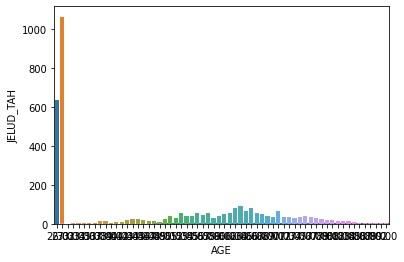

[  2.    55.     1.     1.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.   140.    80.   120.    90.     0.     0.
   0.     0.     0.     0.     4.     1.     0.     0.     0.     1.
   0.     0.     0.     0.     0.     0.     0.     0.     1.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     1.     3.5    0.   132.     0.38   0.18   1.2    7.8
   3.     2.     0.     0.     0.     1.     0.     1.     0.     0.
   0.     0.     1.     0.     0.     1.     0.     1.     1.     1.
   0.     1.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.  ]
0


In [2]:
import seaborn as sns

sns.kdeplot(d0['AGE'],shade=True)
sn.countplot(d0['SEX'])
sn.countplot(d0['AGE'])
sn.barplot(d0['AGE'],d0['JELUD_TAH'])
plt.show()

'''


print(d0['LET_IS'].dtype)

import seaborn as sns
#sns.kdeplot(d0['AGE'],shade=True)
sns.scatterplot(x=d0['AGE'],y=d0['GB'],data=d0)

plt.show()


print(d0.head(1).transpose()) # print first five rows of d0.
#print(d0.tail(10))
# save the labels into a variable l.
print('shape of data set=',d0.shape)
print('size of data set=',d0.size)


d0.info()
d0.describe()
#at=d0.select_dtypes(include='object').columns
#print(cat)

print(list(d0))

print(d0.isnull().sum())#count missing values per columns
#sn.countplot(d0['SEX'])
#sn.countplot(d0['AGE'])
sn.barplot(d0['AGE'],d0['JELUD_TAH'])
plt.show()
#imputing missing values
'''

#To count the number 
nbr_null_elements=np.count_nonzero(np.isnan(d0_imputed))
print(d0_imputed[1])
print(nbr_null_elements)






(1700, 123)
shape of pca_reduced.shape =  (1700, 10)


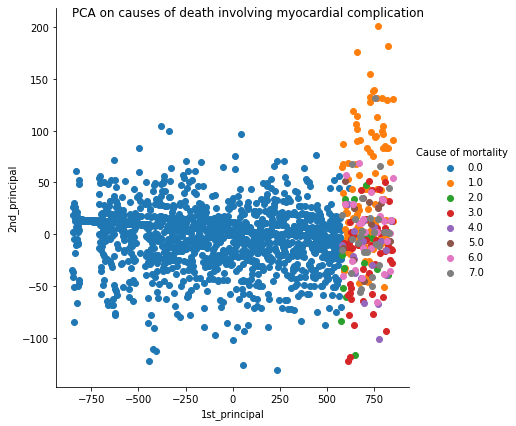

In [7]:
# initializing the pca
from sklearn import decomposition

pca = decomposition.PCA()

# configuring the parameteres
# the number of components = 2
pca.n_components = 10
print(d0_imputed.shape)
pca_data = pca.fit_transform(d0_imputed)
# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

pca_data_stacked = np.vstack((pca_data[:,0:2].T, y)).T


import matplotlib 
from matplotlib import legend

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D



import seaborn as sn
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data_stacked, columns=("1st_principal", "2nd_principal","label"))

g=sn.FacetGrid(pca_df,hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend(title="Cause of mortality")
g.fig.suptitle("PCA on causes of death involving myocardial complication")

plt.show()




[2 2 2 ... 4 4 4]


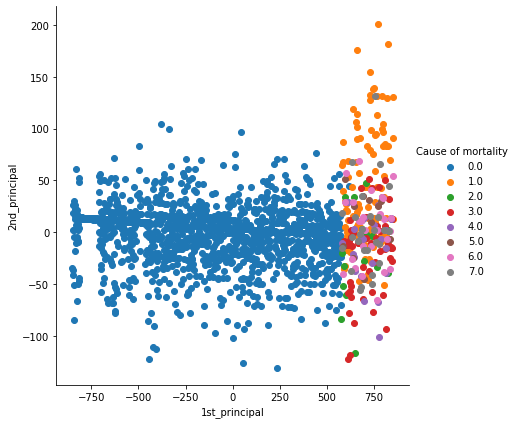

In [9]:


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0).fit(pca_data)
predicted_labels=kmeans.labels_
print(predicted_labels)
pca_data_stacked_kmeans = np.vstack((pca_data[:,0:2].T, predicted_labels)).T
pca_df = pd.DataFrame(data=pca_data_stacked, columns=("1st_principal", "2nd_principal","predicted_labels"))
g=sn.FacetGrid(pca_df,hue="predicted_labels", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend(title="Cause of mortality")
plt.show()





  Cloning https://github.com/j-bac/scikit-dimension.git to /tmp/pip-req-build-lf5ediih
  Running command git clone -q https://github.com/j-bac/scikit-dimension.git /tmp/pip-req-build-lf5ediih
  Created wheel for skdim: filename=skdim-0.1.1-cp36-none-any.whl size=63879 sha256=0ba6847599e4c1c5a531a7a3834d1ef8a7f9ed9386f34d689e623ac1958fcb96
  Stored in directory: /tmp/pip-ephem-wheel-cache-ra_fu38b/wheels/13/cc/a5/29084b1dc11779e4e314c134c1a30c3d6fe798e541fcf2624b
Successfully built skdim
7.061937033279946


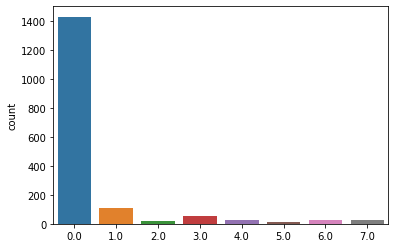

In [10]:


!pip install git+https://github.com/j-bac/scikit-dimension.git

#Estimation of the intrinsic dimensionality

import skdim
#d0=scale_matrix(d0)
#estimate global intrinsic dimension
danco = skdim.id.DANCo().fit(d0_imputed)
print(danco.dimension_)

import seaborn as sns
sns.countplot(y)
plt.show()